In [95]:
from glob import glob
import csv
import operator
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
from sklearn.utils.validation import check_array
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
import graphviz
from IPython import display
from coloredweighteddoc import ColoredWeightedDoc
from scipy.sparse import diags, issparse

In [2]:
def load_imdb_data(path_to_imdb):
    print("Loading the imdb reviews data")
    train_neg_files = glob(path_to_imdb + r"/train/neg/*.txt")
    train_pos_files = glob(path_to_imdb + r"/train/pos/*.txt")
    train_corpus = []
    y_train = []
    for tnf in train_neg_files:
            with open(tnf, 'r', errors='replace') as f:
                line = f.read()
                train_corpus.append(line)
                y_train.append(0)

    for tpf in train_pos_files:
        with open(tpf, 'r', errors='replace') as f:
            line = f.read()
            train_corpus.append(line)
            y_train.append(1)

    test_neg_files = glob(path_to_imdb + r"/test/neg/*.txt")
    test_pos_files = glob(path_to_imdb + r"/test/pos/*.txt")

    test_corpus = []

    y_test = []

    for tnf in test_neg_files:
        with open(tnf, 'r', errors='replace') as f:
            test_corpus.append(f.read())
            y_test.append(0)

    for tpf in test_pos_files:
        with open(tpf, 'r', errors='replace') as f:
            test_corpus.append(f.read())
            y_test.append(1)

    print("Data loaded.")
    return train_corpus, y_train, test_corpus, y_test

In [3]:
path_to_imdb = "C:/Users/mbilgic/Desktop/aclImdb"

In [4]:
train_corpus, y_train, test_corpus, y_test = load_imdb_data(path_to_imdb)

Loading the imdb reviews data
Data loaded.


In [5]:
train_corpus = np.array(train_corpus)
test_corpus = np.array(test_corpus)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
vectorizer = CountVectorizer(lowercase=True, min_df=5, ngram_range=(1,1), binary=True)

In [7]:
X_train = vectorizer.fit_transform(train_corpus)
X_test = vectorizer.transform(test_corpus)

In [8]:
words = vectorizer.get_feature_names()

# Top Features

In [9]:
X_train.shape

(25000, 27315)

In [10]:
def negative_positive_counts(X, y, word_index):
    neg_count = np.sum(X[y==0, word_index])
    pos_count = np.sum(X[y==1, word_index])    
    return neg_count, pos_count

In [11]:
def print_top_words(words, weights, top_k=10):
    sorted_indices_ascending = np.argsort(weights)
    sorted_indices_descending = sorted_indices_ascending[::-1]
    print("Top positive\n")
    for i in sorted_indices_descending[: top_k]:
        print("%s\t%0.2f" %(words[i], weights[i]))
    print("\nTop negative\n")
    for i in sorted_indices_ascending[: top_k]:
        print("%s\t%0.2f" %(words[i], weights[i]))

In [12]:
def print_top_words_with_counts(X, y, words, weights, top_k=10):
    sorted_indices_ascending = np.argsort(weights)
    sorted_indices_descending = sorted_indices_ascending[::-1]
    print("Top negative\n")
    for i in sorted_indices_ascending[: top_k]:
        n_p=negative_positive_counts(X, y, i)
        print("%s [%d, %d]\t%0.2f" %(words[i], n_p[0], n_p[1], weights[i]))
    print("\nTop positive\n")
    for i in sorted_indices_descending[: top_k]:
        n_p=negative_positive_counts(X, y, i)
        print("%s [%d, %d]\t%0.2f" %(words[i], n_p[0], n_p[1], weights[i]))


In [469]:
c=1

In [470]:
l2lr = LogisticRegression(penalty='l2', C=c)
l2lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [471]:
l2lr.score(X_train, y_train)

0.99687999999999999

In [472]:
l2lr.score(X_test, y_test)

0.86848000000000003

In [473]:
np.sum(l2lr.coef_[0] == 0)

0

In [474]:
print_top_words_with_counts(X_train, y_train, words, l2lr.coef_[0])

Top negative

worst [2042, 227]	-2.33
waste [1208, 96]	-2.25
disappointment [303, 85]	-2.05
poorly [561, 68]	-2.04
awful [1292, 153]	-1.74
unfunny [218, 15]	-1.66
laughable [360, 39]	-1.64
disappointing [312, 82]	-1.59
lacks [249, 92]	-1.59
boring [1207, 302]	-1.56

Top positive

refreshing [25, 172]	1.60
excellent [350, 1430]	1.58
appreciated [41, 147]	1.55
hooked [37, 95]	1.40
perfect [306, 1052]	1.38
superb [97, 524]	1.36
vengeance [24, 58]	1.35
underrated [33, 194]	1.30
greene [5, 33]	1.30
wonderfully [36, 276]	1.28


In [475]:
c=1
l1lr = LogisticRegression(penalty='l1', C=c)
l1lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [476]:
l1lr.score(X_train, y_train)

0.97943999999999998

In [477]:
l1lr.score(X_test, y_test)

0.86631999999999998

In [478]:
np.sum(l1lr.coef_[0] != 0)

4718

In [479]:
print_top_words_with_counts(X_train, y_train, words, l1lr.coef_[0])

Top negative

wayans [26, 1]	-4.07
halloran [6, 2]	-3.64
thunderbirds [21, 1]	-3.23
lifeless [49, 10]	-2.93
uneducated [19, 10]	-2.91
unremarkable [23, 8]	-2.75
abomination [37, 4]	-2.72
unlikeable [51, 7]	-2.71
refer [44, 25]	-2.59
sources [31, 18]	-2.52

Top positive

fez [1, 12]	3.86
cafã [5, 25]	3.63
poisoning [2, 11]	3.38
cerebral [11, 46]	3.02
endearingly [2, 11]	3.01
greene [5, 33]	2.79
vengeance [24, 58]	2.78
finely [3, 35]	2.62
refreshing [25, 172]	2.49
marty [15, 22]	2.41


In [480]:
mnb = MultinomialNB(alpha=1)

In [481]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [482]:
mnb.score(X_train, y_train)

0.88868000000000003

In [483]:
mnb.score(X_test, y_test)

0.83023999999999998

In [484]:
mnb_weights = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]

In [485]:
print_top_words_with_counts(X_train, y_train, words, mnb_weights)

Top negative

boll [58, 1]	-3.39
uwe [56, 1]	-3.36
manos [27, 0]	-3.34
slater [24, 0]	-3.23
savini [23, 0]	-3.19
kareena [22, 0]	-3.14
hobgoblins [22, 0]	-3.14
btk [20, 0]	-3.05
leaden [20, 0]	-3.05
rosanna [20, 0]	-3.05

Top positive

edie [0, 40]	3.71
din [0, 25]	3.25
antwone [0, 24]	3.21
mcintire [0, 24]	3.21
tsui [0, 23]	3.17
gunga [0, 23]	3.17
visconti [0, 21]	3.08
sabu [0, 21]	3.08
goldsworthy [0, 21]	3.08
joss [0, 20]	3.04


In [492]:
dt = tree.DecisionTreeClassifier(max_depth=None, min_impurity_decrease=0.00001)

In [493]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-05, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [494]:
dt.score(X_train, y_train)

1.0

In [495]:
dt.score(X_test, y_test)

0.70999999999999996

In [488]:
class_names=["Negative", "Positive"]

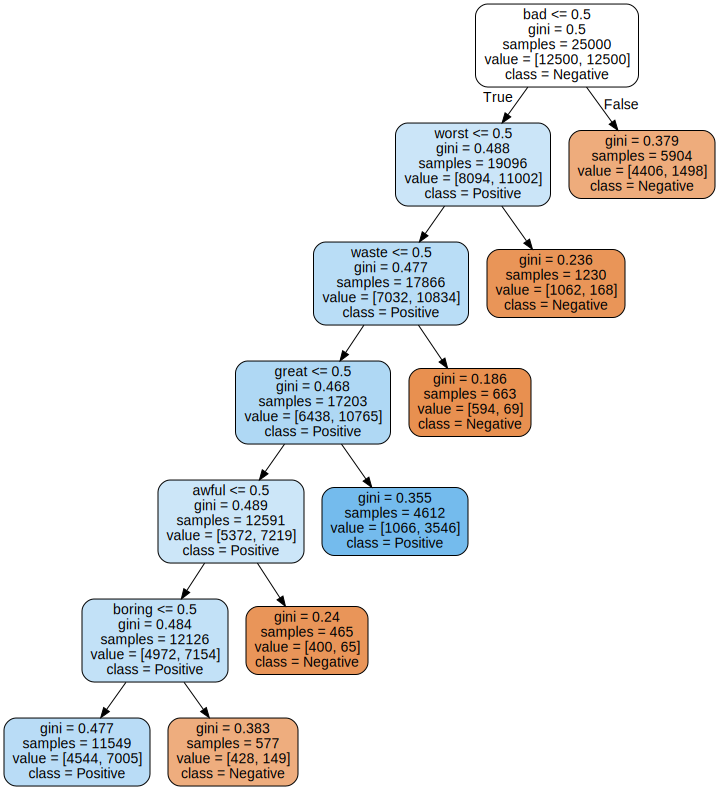

In [489]:
dot_data = tree.export_graphviz(dt, feature_names=words, class_names=class_names, 
                                filled=True, rounded = True, out_file=None)
graph = graphviz.Source(dot_data)
graph

# Evidences

In [496]:
def compute_evidences_nonnegative_matrix(weights, X, bias=0):   
    X = check_array(X, accept_sparse="csr")
    neg_weights = weights * (weights < 0)
    pos_weights = weights * (weights > 0)
    if issparse(X):
        neg_evi = X * neg_weights
        pos_evi = X * pos_weights
    else:
        neg_evi = np.dot(X, neg_weights)
        pos_evi = np.dot(X, pos_weights)
    
    if bias > 0:
        pos_evi += bias
    else:
        neg_evi -= bias
    return neg_evi, pos_evi

In [497]:
def print_top_words_in_a_doc(x, words, weights, top_k=10):
    indices = x.indices
    ascending = np.argsort(weights[indices])
    descending = ascending[::-1]
    print("Top negative\n")
    for i in ascending[: top_k]:
        if weights[indices[i]] >= 0:
            break
        print("%s\t%0.2f" %(words[indices[i]], weights[indices[i]]))
    print("\nTop positive\n")
    for i in descending[: top_k]:
        if weights[indices[i]] <= 0:
            break
        print("%s\t%0.2f" %(words[indices[i]], weights[indices[i]]))

In [498]:
j=1

In [499]:
test_corpus[j]

"This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and Ice Cube, who've each proven many times over that they are capable of acting, and acting well. Don't bother with this one, go see New Jack City, Ricochet or watch New York Undercover for Ice-T, or Boyz n the Hood, Higher Learning or Friday for Ice Cube and see the real deal. Ice-T's horribly cliched dialogue alone makes this film grate at the teeth, and I'm still wondering what the heck Bill Paxton was doing in this film? And why the heck does he always play the exact same character? From Aliens onward, every film I've seen with Bill Paxton has him playing the exact same irritating character, and at least in Aliens his character died, which made it somewhat gratifying...<br /><br />Overall, this is second-rate action trash. There are countless better films to see, and if you really want to s

In [500]:
print_top_words_in_a_doc(X_test[j], words, l2lr.coef_[0])

Top negative

waste	-2.25
boring	-1.56
horrible	-1.28
nothing	-0.87
talents	-0.71
barely	-0.71
irritating	-0.55
learning	-0.53
script	-0.53
exact	-0.46

Top positive

refreshing	1.60
jack	0.79
worth	0.58
paxton	0.53
hood	0.51
well	0.49
undercover	0.48
deal	0.48
somewhat	0.46
still	0.44


In [501]:
print_top_words_in_a_doc(X_test[j], words, l1lr.coef_[0])

Top negative

waste	-2.37
boring	-1.44
horrible	-1.20
nothing	-0.80
barely	-0.70
learning	-0.51
generic	-0.51
talents	-0.47
aliens	-0.43
script	-0.42

Top positive

refreshing	2.49
jack	0.78
undercover	0.53
worth	0.51
deal	0.49
somewhat	0.48
paxton	0.47
ice	0.47
well	0.43
still	0.42


In [502]:
print_top_words_in_a_doc(X_test[j], words, mnb_weights)

Top negative

waste	-2.53
horrible	-1.72
bother	-1.40
boring	-1.39
horribly	-1.39
cliched	-1.29
irritating	-1.24
generic	-1.09
trash	-1.09
ricochet	-0.92

Top positive

refreshing	1.89
gratifying	1.24
paxton	0.95
york	0.61
always	0.55
jack	0.54
city	0.54
each	0.45
boyz	0.40
undercover	0.37


In [503]:
display.display(ColoredWeightedDoc(test_corpus[j], words, l2lr.coef_[0], binary = True))

In [504]:
display.display(ColoredWeightedDoc(test_corpus[j], words, l1lr.coef_[0], binary = True))

In [505]:
display.display(ColoredWeightedDoc(test_corpus[j], words, mnb_weights, binary = True))

## The effect of C and penalty

In [510]:
c=0.005
p='l1'
lr = LogisticRegression(penalty=p, C=c)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.predict_proba(X_test[to]))
display.display(ColoredWeightedDoc(test_corpus[to], words, lr.coef_[0], binary = True))

0.77432
[[ 0.80401571  0.19598429]]


In [71]:
c=100
p='l2'
lr = LogisticRegression(penalty=p, C=c)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.predict_proba(X_test[to]))
display.display(ColoredWeightedDoc(test_corpus[to], words, lr.coef_[0], binary = True))

0.8536
[[  9.99712586e-01   2.87413721e-04]]


In [70]:
c=0.01
p='l2'
lr = LogisticRegression(penalty=p, C=c)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.predict_proba(X_test[to]))
display.display(ColoredWeightedDoc(test_corpus[to], words, lr.coef_[0], binary = True))

0.87644
[[ 0.90645679  0.09354321]]


In [74]:
c=0.00001
p='l2'
lr = LogisticRegression(penalty=p, C=c)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.predict_proba(X_test[to]))
display.display(ColoredWeightedDoc(test_corpus[to], words, lr.coef_[0], binary = True))

0.7488
[[ 0.50974154  0.49025846]]


## The effect of alpha

In [78]:
a=1
mnb = MultinomialNB(alpha=a)
mnb.fit(X_train, y_train)
mnb_weights = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]
print(mnb.score(X_test, y_test))
print(mnb.predict_proba(X_test[to]))
display.display(ColoredWeightedDoc(test_corpus[to], words, mnb_weights, binary = True))

0.83024
[[  9.99999957e-01   4.27687097e-08]]


In [83]:
a=100
mnb = MultinomialNB(alpha=a)
mnb.fit(X_train, y_train)
mnb_weights = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]
print(mnb.score(X_test, y_test))
print(mnb.predict_proba(X_test[to]))
display.display(ColoredWeightedDoc(test_corpus[to], words, mnb_weights, binary = True))

0.82048
[[  9.99991166e-01   8.83378725e-06]]


In [87]:
a=0.01
mnb = MultinomialNB(alpha=a)
mnb.fit(X_train, y_train)
mnb_weights = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]
print(mnb.score(X_test, y_test))
print(mnb.predict_proba(X_test[to]))
display.display(ColoredWeightedDoc(test_corpus[to], words, mnb_weights, binary = True))

0.82368
[[  9.99999970e-01   2.97835803e-08]]


## Most

In [511]:
clf_str = 'l1lr'

In [525]:
if clf_str == 'mnb':
    a=1
    clf = MultinomialNB(alpha=a)
    clf.fit(X_train, y_train)
    weights = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]
    bias = clf.class_log_prior_[1] - clf.class_log_prior_[0]
elif clf_str == 'l1lr':
    c=0.01
    p='l1'
    clf = LogisticRegression(penalty=p, C=c)
    clf.fit(X_train, y_train)
    weights = clf.coef_[0]
    bias = clf.intercept_[0]
elif clf_str == 'l2lr':
    c=1
    p='l2'
    clf = LogisticRegression(penalty=p, C=c)
    clf.fit(X_train, y_train)
    weights = clf.coef_[0]
    bias = clf.intercept_[0]
else:
    print("Unknown classifier")
    clf = None

In [526]:
clf.score(X_train, y_train)

0.81552000000000002

In [527]:
clf.score(X_test, y_test)

0.81240000000000001

In [528]:
probs = clf.predict_proba(X_test)
neg_evi, pos_evi = compute_evidences_nonnegative_matrix(weights, X_test, bias)

### Most Negative wrt Probs

In [529]:
j = np.argmax(probs[:,0])
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[  9.99197033e-01   8.02966968e-04]
-9.39312664015
2.26673294965


### Most Positive wrt Probs

In [530]:
j = np.argmax(probs[:,1])
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[ 0.00448513  0.99551487]
-0.823021349497
6.22551464475


### Highest Negative Evidence

In [531]:
j = np.argmin(neg_evi)
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[  9.99126863e-01   8.73136873e-04]
-9.57568735984
2.53314264832


### Highest Positive Evidence

In [532]:
j = np.argmax(pos_evi)
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[ 0.0065093  0.9934907]
-2.03764192191
7.06563495053


### 80+% negative document that has the least amount of evidence for the positive class

In [533]:
neg_probs = probs[:,0]
neg_enough_indices = np.arange(len(neg_probs))[neg_probs > 0.80]
least_pos = np.argsort(pos_evi[neg_enough_indices])[0]
j = neg_enough_indices[least_pos]
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[ 0.80707604  0.19292396]
-1.43112173693
0.0


### 80+% positive document that has the least amount of evidence for the negative class

In [534]:
pos_probs = probs[:,1]
pos_enough_indices = np.arange(len(pos_probs))[pos_probs > 0.8]
least_neg = np.argsort(neg_evi[pos_enough_indices])[-1]
j = pos_enough_indices[least_neg]
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[ 0.19432146  0.80567854]
0.0
1.42217104654


### Most Uncertain

In [535]:
uncertainty = np.min(probs, axis=1)
j = np.argsort(uncertainty)[-1]
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[ 0.5  0.5]
0.0
0.0


### Uncertain due to conflicting evidence

In [536]:
unc_enough_indices = np.arange(len(uncertainty))[uncertainty > 0.48]
conflict = np.min([pos_evi, abs(neg_evi)], axis=0)
most_conflicted = np.argmax(conflict[unc_enough_indices])
j = unc_enough_indices[most_conflicted]
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[ 0.50564394  0.49435606]
-5.05150670125
5.02892997493


### Uncertain due to insufficient evidence

In [537]:
unc_enough_indices = np.arange(len(uncertainty))[uncertainty > 0.48]
conflict = np.max([pos_evi, abs(neg_evi)], axis=0)
least_conflicted = np.argmin(conflict[unc_enough_indices])
j = unc_enough_indices[least_conflicted]
print(probs[j])
print(neg_evi[j])
print(pos_evi[j])
display.display(ColoredWeightedDoc(test_corpus[j], words, weights, binary = True))

[ 0.5  0.5]
0.0
0.0
